In [1]:
# ライブラリのインポート

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score

print("libraries imported")

libraries imported


Data
<class 'numpy.ndarray'>
(1797, 64)
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
Classes  [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[0 1 2 ..., 8 9 8]
Sample Data
4


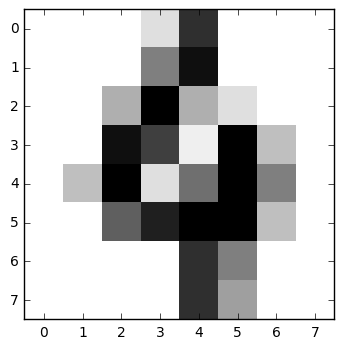

0


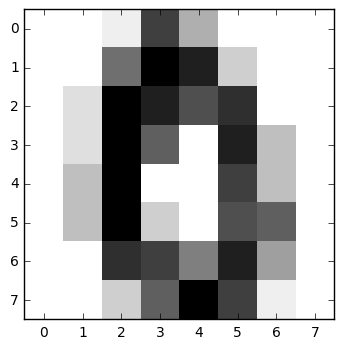

In [2]:
# Load data
digits = datasets.load_digits()

# データを見てみる
print("Data")
print(digits.data.__class__)
print(digits.data.shape)
print(digits.data)
print("Classes ", digits.target_names)
print(digits.target.__class__)
print(digits.target)

print("Sample Data")
print(digits.target[100])
plt.imshow(digits.data[100].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

print(digits.target[101])
plt.imshow(digits.data[101].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
## 使うデータはこれ
X = digits.data # 64次元特徴ベクトル
y = digits.target # 0から9のラベル

In [4]:
# scikit-learnのモデルに準じたクラスを実装してみる
from sklearn.base import BaseEstimator
from collections import Counter

# k-NN法の実装
# see https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95
class MyNeaestNeiborClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, neighbor_size=4):
        self.neighbor_size = neighbor_size
    
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        return self

    def predict(self, newX):
        distance_and_label = self._distance_and_label(newX)

        neighbors = sorted(distance_and_label, key=lambda d: d[0])[0:self.neighbor_size]
        labels = [d[1] for d in neighbors]

        counter = Counter(labels)
        estimate = counter.most_common()
        return estimate[0][0]
    
    def _distance_and_label(self, newX):
        return [(self._distance(x, newX), y) for x, y in zip(self.X, self.Y)]
    
    def _distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)
    
    def score(self, X, y):
        hit = 0
        for index, x in enumerate(X):
            pred = self.predict(x)
            hit += 1 if pred == y[index] else 0
                
        return float(hit) / y.shape[0]

prediction 4


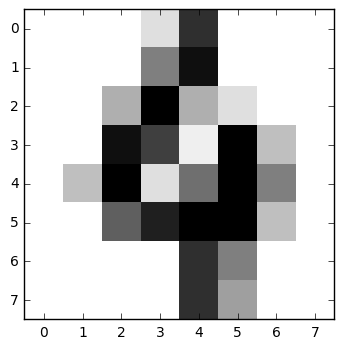

prediction 0


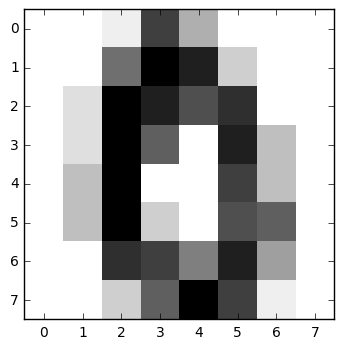

prediction 5


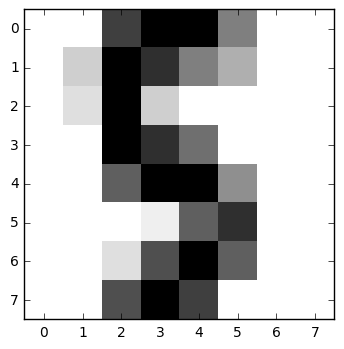

Accuracy: 0.96 (+/- 0.03)


In [5]:
# 上でつくった識別器の評価

clf = MyNeaestNeiborClassifier()
clf.fit(digits.data, digits.target)

print("prediction", clf.predict(X[100]))
plt.imshow(digits.data[100].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

print("prediction", clf.predict(X[101]))
plt.imshow(digits.data[101].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

print("prediction", clf.predict(X[102]))
plt.imshow(digits.data[102].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))